In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-cr/train.csv
/kaggle/input/bri-data-hackathon-cr-optimization/sample_submission.csv
/kaggle/input/bri-data-hackathon-cr-optimization/data_description.csv
/kaggle/input/bri-data-hackathon-cr-optimization/train.csv
/kaggle/input/bri-data-hackathon-cr-optimization/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/train-cr/train.csv')
# test = pd.read_csv('/kaggle/input/bri-data-hackathon-cr-optimization/test.csv')

In [4]:
desc = pd.read_csv('/kaggle/input/bri-data-hackathon-cr-optimization/data_description.csv')

In [5]:
desc

,variabel,sample Data,Deskripsi
0,cash_in_echannel,7.924471e+09,Total Kas Masuk pada kas eChannel (ATM dan CRM)
1,cash_out_echannel,7.924471e+09,Total Kas keluar pada kas eChannel (ATM dan CRM)
2,cash_in_kantor,1.372300e+10,Total kas masuk pada kas kantor
3,cash_out_kantor,-2.767644e+10,Total kas keluar pada kas kantor
4,cr_ketetapan_total_bkn_sum,4.350000e+00,Maksimum cash ratio yang dii tetapkan kantor p...
5,giro,5.355247e+10,Total simpanan giro
6,deposito,1.344615e+10,Total simpanan deposito
7,kewajiban_lain,3.490872e+09,"Simpanan selain giro tabungan dan deposito ,sa..."
8,tabungan,1.659893e+11,Total simpanan tabungan
9,rata_dpk_mingguan,2.401906e+11,rata - rata saldo DPK mingguan


In [6]:
from datetime import datetime, timedelta

# mengetahui apakah kolom ini sudah memiliki tipe datetime 
print(train['periode'].dtypes)
# ternyata tipenya masih objek untuk mengambil komponen tanggal kita haru mengubahnya menjadi datetime terlebih dahulu

# mengubah kolom menjadi tipe datetime
train['periode'] = pd.to_datetime(train['periode'])

print(train['periode'].dtypes)

# membuat semua date range yang seharusnya ada
range = pd.date_range(train['periode'].min(), train['periode'].max(), freq='D')

# mengambil semua datatime di data
current_date = train['periode'].dt.date.unique()

# mengecek tanggal mana yang tidak ada pada data
not_in_data = [x.strftime("%Y/%m/%d") for x in range if x not in current_date]

object
datetime64[ns]


EDA

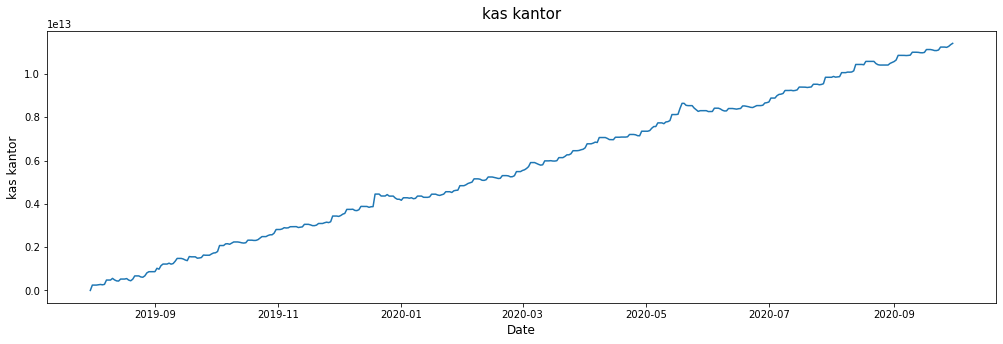

In [7]:


fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.kas_kantor)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("kas kantor", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("kas kantor", fontdict={'fontsize': '12'})

plt.show()

In [8]:
train.columns

Index(['periode', 'cash_in_echannel', 'cash_out_echannel', 'cash_in_kantor',
       'cash_out_kantor', 'cr_ketetapan_total_bkn_sum', 'giro', 'deposito',
       'kewajiban_lain', 'tabungan', 'rata_dpk_mingguan', 'kas_kantor',
       'kas_echannel'],
      dtype='object')

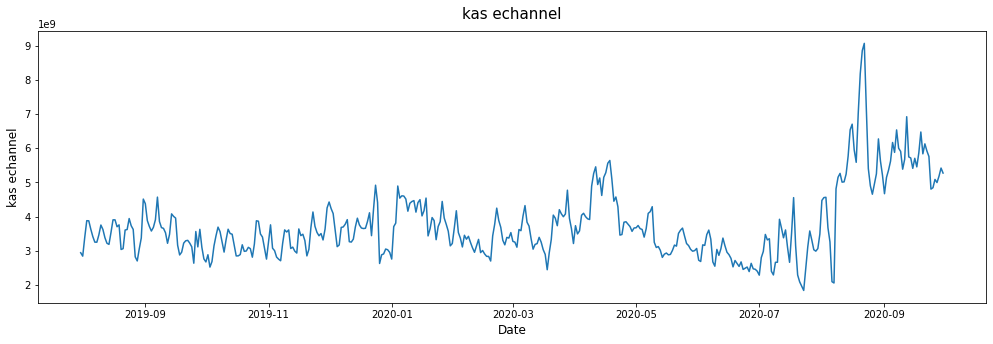

In [9]:


fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.kas_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("kas echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("kas echannel", fontdict={'fontsize': '12'})

plt.show()

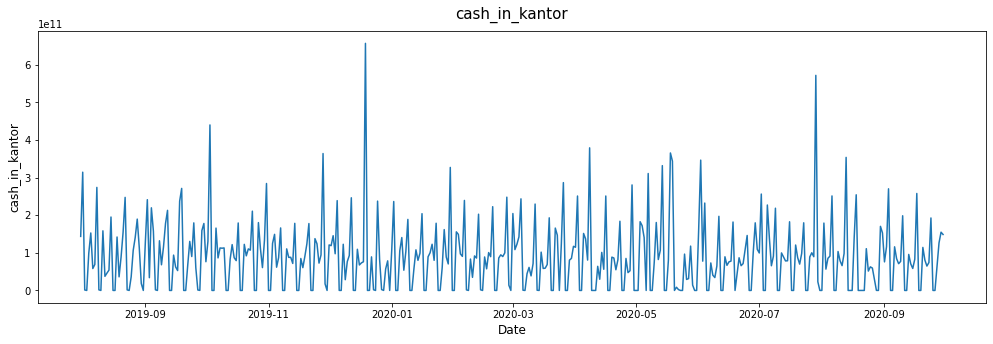

In [10]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.cash_in_kantor)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_in_kantor", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_in_kantor", fontdict={'fontsize': '12'})

plt.show()

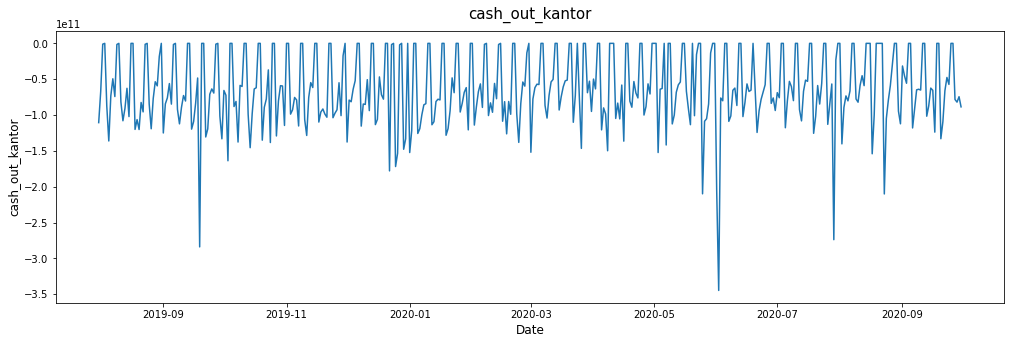

In [11]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.cash_out_kantor)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_out_kantor", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_out_kantor", fontdict={'fontsize': '12'})

plt.show()

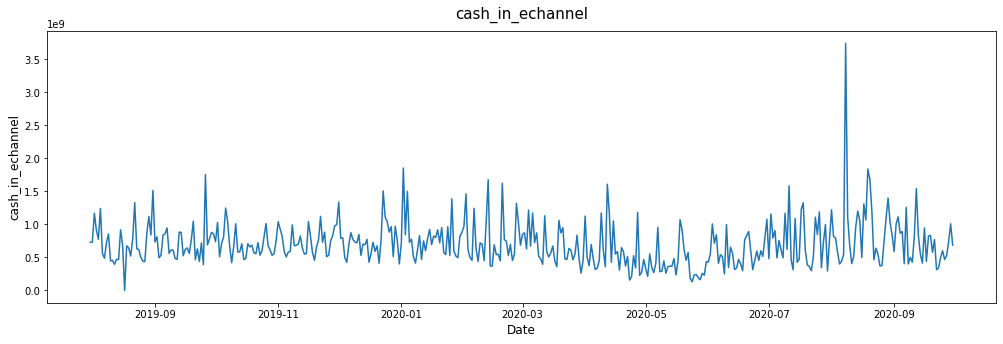

In [12]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.cash_in_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_in_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_in_echannel", fontdict={'fontsize': '12'})

plt.show()

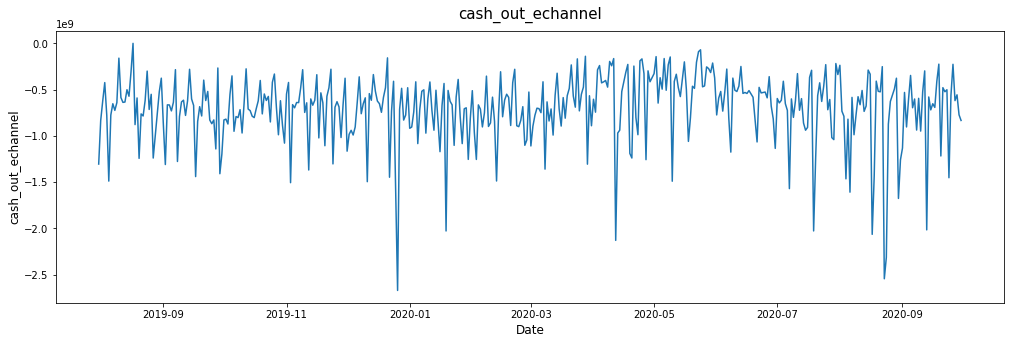

In [13]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.cash_out_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_out_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_out_echannel", fontdict={'fontsize': '12'})

plt.show()

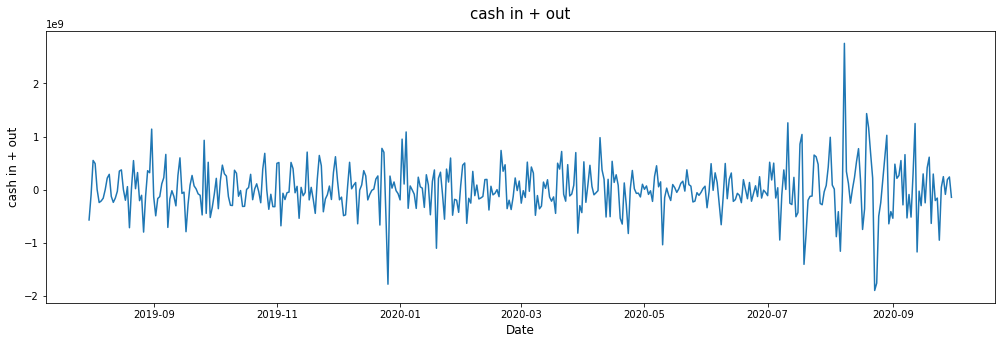

In [14]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(train.periode, train.cash_in_echannel+train.cash_out_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash in + out", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash in + out", fontdict={'fontsize': '12'})

plt.show()

In [15]:
(train.cash_in_echannel+train.cash_out_echannel).sum()

1758700000.0

## without tuning

cash in echannel

In [16]:
df = train[['periode','cash_in_echannel']]
df = df.rename(columns={"periode": "ds", "cash_in_echannel": "y"})


In [17]:
from fbprophet import Prophet

In [18]:
m = Prophet()
m.fit(df)

In [19]:
future = m.make_future_dataframe(periods=31)
future.tail()

,ds
451,2020-10-27
452,2020-10-28
453,2020-10-29
454,2020-10-30
455,2020-10-31


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
451,2020-10-27,7.007536e+08,2.739851e+08,1.097226e+09
452,2020-10-28,7.725613e+08,3.627149e+08,1.208305e+09
453,2020-10-29,9.156301e+08,5.104605e+08,1.362646e+09
454,2020-10-30,9.080444e+08,5.161341e+08,1.316086e+09
455,2020-10-31,9.210519e+08,5.353228e+08,1.338619e+09


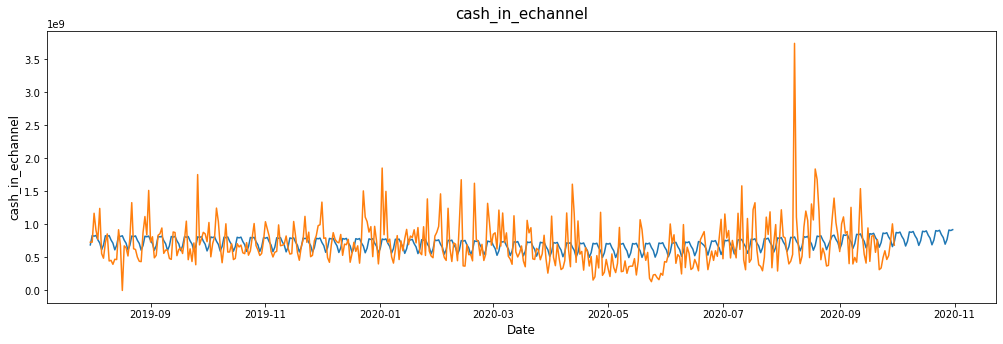

In [21]:
# pertama mari kita hitung demand per jam per tanggal
# daily_demand = train.groupby('date')['count'].mean()

# langkah selanjutnya adalah memvisualisasikannya
# plt.figures() adalah suatu kanvas yang nanti bisa kita tambahkan dengan berbagai visualisasi
# figsize artinya besar dari gambar (x, y)
# add_subplot memiliki 3 digit, dua digit pertama menandakan jumlah row dan kolom
# digit terakhir menandakan letak dari plot 
# 111 artinya hanya ada satu buah bagian

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_in_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_in_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_in_echannel", fontdict={'fontsize': '12'})

plt.show()

In [22]:
cashin_forcast = forecast[-31:]

cash out echannel

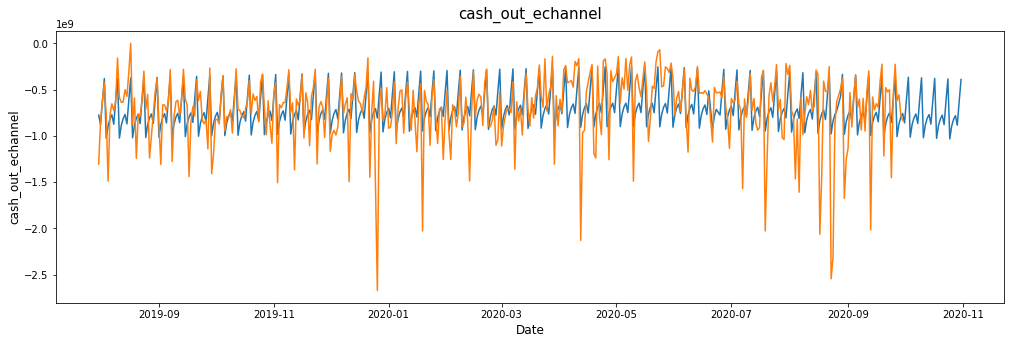

In [23]:
df = train[['periode','cash_out_echannel']]
df = df.rename(columns={"periode": "ds", "cash_out_echannel": "y"})

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=31)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_out_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_out_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_out_echannel", fontdict={'fontsize': '12'})

plt.show()

In [24]:
cashout_forcast = forecast[-31:]

In [25]:
cashout_forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
425,2020-10-01,-7.531787e+08,-1.256555e+09,-4.572355e+08,-7.531787e+08,-7.531787e+08,-1.069342e+08,-1.069342e+08,-1.069342e+08,-1.069342e+08,-1.069342e+08,-1.069342e+08,0.0,0.0,0.0,-8.601130e+08
426,2020-10-02,-7.540509e+08,-1.024711e+09,-1.814734e+08,-7.540509e+08,-7.540509e+08,1.497807e+08,1.497807e+08,1.497807e+08,1.497807e+08,1.497807e+08,1.497807e+08,0.0,0.0,0.0,-6.042702e+08
427,2020-10-03,-7.549231e+08,-7.482296e+08,2.299917e+07,-7.549231e+08,-7.549231e+08,3.886918e+08,3.886918e+08,3.886918e+08,3.886918e+08,3.886918e+08,3.886918e+08,0.0,0.0,0.0,-3.662313e+08
428,2020-10-04,-7.557953e+08,-1.377957e+09,-6.280638e+08,-7.557953e+08,-7.557859e+08,-2.581834e+08,-2.581834e+08,-2.581834e+08,-2.581834e+08,-2.581834e+08,-2.581834e+08,0.0,0.0,0.0,-1.013979e+09
429,2020-10-05,-7.566674e+08,-1.284804e+09,-4.777591e+08,-7.566795e+08,-7.566250e+08,-1.214524e+08,-1.214524e+08,-1.214524e+08,-1.214524e+08,-1.214524e+08,-1.214524e+08,0.0,0.0,0.0,-8.781198e+08


In [26]:
train.tail()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
420,2020-09-26,4.692000e+08,-226400000.0,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-618750000.0,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-556200000.0,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-772100000.0,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09
424,2020-09-30,6.861000e+08,-833250000.0,1.487817e+11,-8.860700e+10,3.0,7.373418e+11,7.743742e+11,1.311528e+10,7.540607e+11,2.759476e+11,1.140874e+13,5.271900e+09


In [27]:
df = cashin_forcast[['yhat']]

df['yhat']=df['yhat']+cashout_forcast['yhat']

df.to_csv('asd.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df.to_csv('asd.csv')

In [29]:
train

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2020-09-26,4.692000e+08,-2.264000e+08,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-6.187500e+08,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-5.562000e+08,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-7.721000e+08,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09


## Tuning

forier order

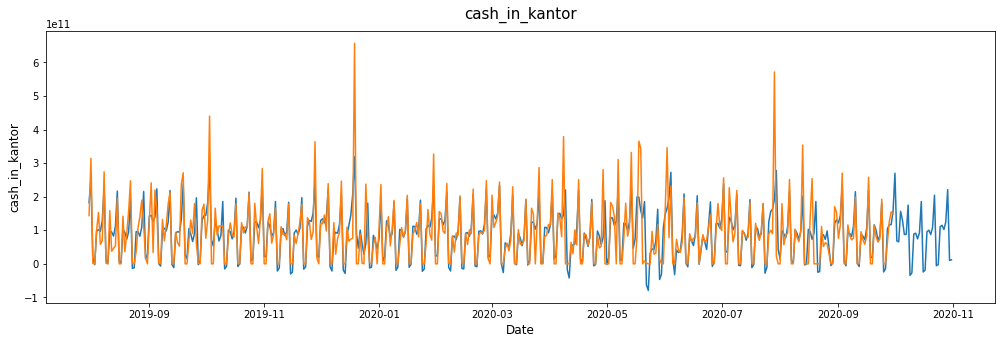

In [30]:
df = train[['periode','cash_in_kantor']]
df = df.rename(columns={"periode": "ds", "cash_in_kantor": "y"})

m = Prophet(yearly_seasonality=50)
m.fit(df)

future = m.make_future_dataframe(periods=31)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_in_kantor)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_in_kantor", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_in_kantor", fontdict={'fontsize': '12'})

plt.show()

In [31]:
kantor_cashin_forcast = forecast[-31:]

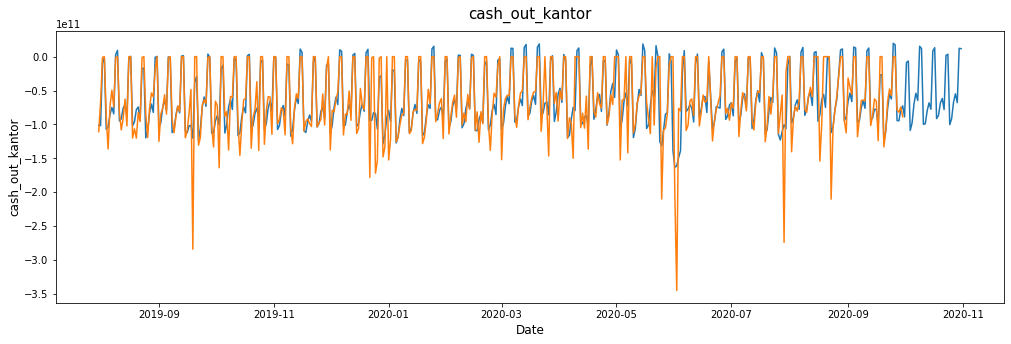

In [32]:
df = train[['periode','cash_out_kantor']]
df = df.rename(columns={"periode": "ds", "cash_out_kantor": "y"})

m = Prophet(yearly_seasonality=50)
m.fit(df)

future = m.make_future_dataframe(periods=31)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_out_kantor)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_out_kantor", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_out_kantor", fontdict={'fontsize': '12'})

plt.show()

In [33]:
kantor_cashout_forcast = forecast[-31:]

echannel in

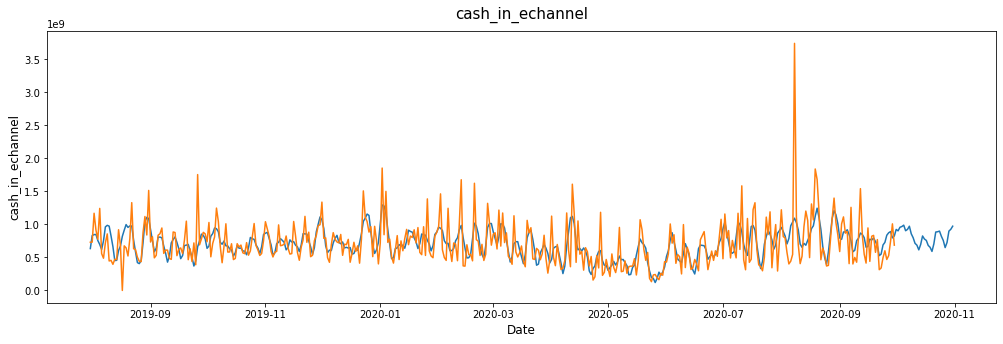

In [34]:
df = train[['periode','cash_in_echannel']]
df = df.rename(columns={"periode": "ds", "cash_in_echannel": "y"})

m = Prophet(yearly_seasonality=50)
m.fit(df)

future = m.make_future_dataframe(periods=31)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_in_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_in_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_in_echannel", fontdict={'fontsize': '12'})

plt.show()

In [35]:
cashin_forcast = forecast[-31:]

echannel out

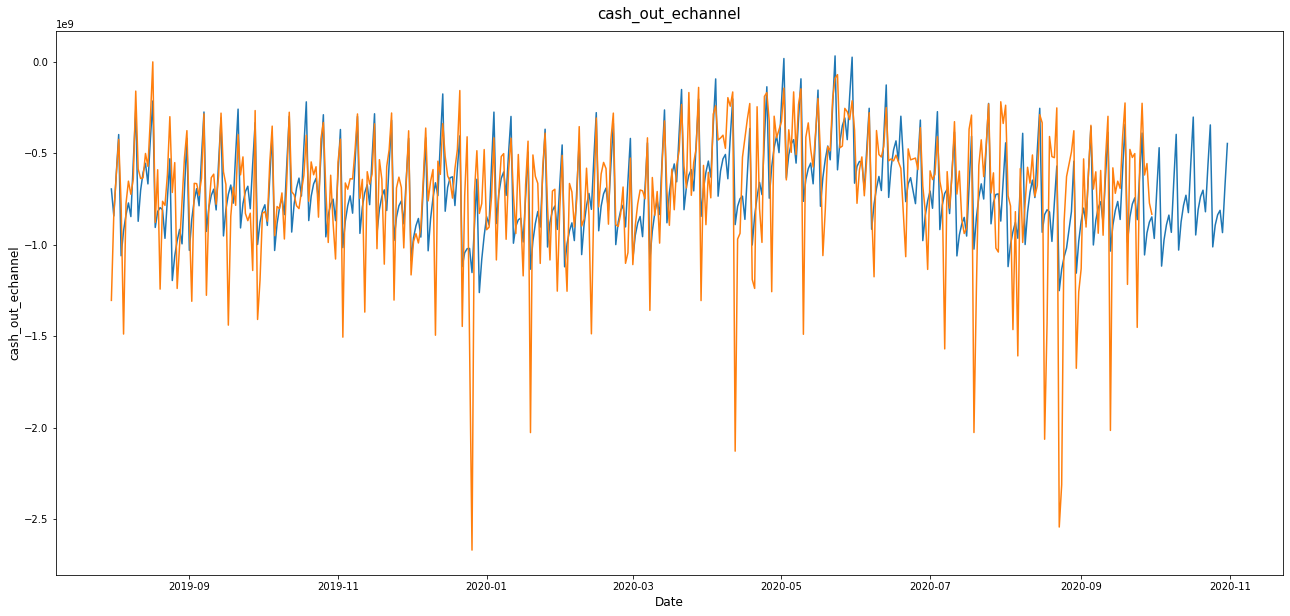

In [36]:
df = train[['periode','cash_out_echannel']]
df = df.rename(columns={"periode": "ds", "cash_out_echannel": "y"})

m = Prophet(yearly_seasonality=20)
m.fit(df)

future = m.make_future_dataframe(periods=31)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(111)

ax.plot(forecast.ds, forecast.yhat)
ax.plot(train.periode, train.cash_out_echannel)

# lalu kita beri judul dan juga kita atur besar text-nya
# argumen pad digunakan untuk mengatur jarak antara plot dengan judul
ax.set_title("cash_out_echannel", fontdict={'fontsize': '15'}, pad = 12)

# lalu kita juga beri label untuk sumbu x dan sumbu y dan juga kita atur besar text-nya
ax.set_xlabel("Date", fontdict={'fontsize': '12'})
ax.set_ylabel("cash_out_echannel", fontdict={'fontsize': '12'})

plt.show()

In [37]:
cashout_forcast = forecast[-31:]

In [38]:
kantor_cashin_forcast['yhat']

425    2.700238e+11
426    6.810134e+10
427    6.542128e+10
428    1.564271e+11
429    1.302362e+11
430    8.729464e+10
431    8.812925e+10
432    1.751655e+11
433   -3.464692e+10
434   -2.668315e+10
435    8.844656e+10
436    9.144723e+10
437    7.425426e+10
438    9.187742e+10
439    1.857524e+11
440   -2.422687e+10
441   -1.876289e+10
442    9.539098e+10
443    1.003876e+11
444    8.718334e+10
445    1.086353e+11
446    2.044373e+11
447   -5.884436e+09
448   -2.097217e+09
449    1.104494e+11
450    1.148610e+11
451    1.021667e+11
452    1.246017e+11
453    2.210225e+11
454    1.023237e+10
455    1.184230e+10
Name: yhat, dtype: float64

In [39]:
submit=pd.DataFrame()

In [40]:
submit['kantor_in']=kantor_cashin_forcast['yhat']
submit['kantor_out']=kantor_cashout_forcast['yhat']
submit['channel_in']=cashin_forcast['yhat']
submit['channel_out']=cashout_forcast['yhat']


In [41]:
submit

,kantor_in,kantor_out,channel_in,channel_out
425,2.700238e+11,-8.873620e+10,9.246909e+08,-9.656349e+08
426,6.810134e+10,-8.653997e+09,9.032206e+08,-7.097654e+08
427,6.542128e+10,-6.458893e+09,9.572200e+08,-4.693863e+08
428,1.564271e+11,-1.088726e+11,9.684183e+08,-1.116956e+09
429,1.302362e+11,-9.754201e+10,9.890874e+08,-9.744123e+08
430,8.729464e+10,-6.980474e+10,9.048623e+08,-8.908479e+08
431,8.812925e+10,-5.390566e+10,9.249719e+08,-8.380386e+08
432,1.751655e+11,-6.467809e+10,9.731980e+08,-9.323499e+08
433,-3.464692e+10,1.530092e+10,8.583061e+08,-6.552008e+08
434,-2.668315e+10,1.200108e+10,7.992233e+08,-3.965096e+08


In [42]:
submit.loc[submit['kantor_in']<0,'kantor_in']=0
submit.loc[submit['kantor_out']>0,'kantor_out']=0

In [43]:
submit['difkantor']=submit['kantor_in']+submit['kantor_out']
submit['difchannel']=submit['channel_in']+submit['channel_out']

In [44]:
submit.to_csv('submit.csv')

In [45]:
cashout_forcast = forecast[-31:]

In [46]:
train.tail()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
420,2020-09-26,4.692000e+08,-226400000.0,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-618750000.0,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-556200000.0,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-772100000.0,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09
424,2020-09-30,6.861000e+08,-833250000.0,1.487817e+11,-8.860700e+10,3.0,7.373418e+11,7.743742e+11,1.311528e+10,7.540607e+11,2.759476e+11,1.140874e+13,5.271900e+09


cross val

In [47]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


df_cv = cross_validation(m, initial='360 days', period='30 days', horizon = '40 days')

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.358249e+18,1.165439e+09,1.009276e+09,0.640453,0.586613,0.333333
1,4 days,1.346645e+18,1.160450e+09,9.571069e+08,0.402116,0.581985,0.333333
2,5 days,6.262763e+17,7.913762e+08,5.452846e+08,0.343066,0.409464,0.666667
3,7 days,3.847046e+16,1.961389e+08,1.699000e+08,0.297742,0.409464,1.000000
4,8 days,4.069219e+16,2.017231e+08,1.882606e+08,0.363076,0.409464,1.000000


In [48]:
df_cv.head(50)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-08-22,-4.411698e+08,-7.733288e+08,-1.026005e+08,-2.517000e+08,2020-08-21
1,2020-08-23,-1.051656e+09,-1.390340e+09,-6.857053e+08,-2.544000e+09,2020-08-21
2,2020-08-24,-9.667850e+08,-1.308492e+09,-6.039647e+08,-2.312800e+09,2020-08-21
3,2020-08-25,-9.061114e+08,-1.246781e+09,-5.494656e+08,-8.731500e+08,2020-08-21
4,2020-08-26,-8.842275e+08,-1.212123e+09,-5.101382e+08,-6.273500e+08,2020-08-21
5,2020-08-28,-7.128110e+08,-1.062927e+09,-3.601899e+08,-4.929500e+08,2020-08-21
6,2020-08-29,-4.646934e+08,-8.038978e+08,-1.017725e+08,-3.766500e+08,2020-08-21
7,2020-08-30,-1.048515e+09,-1.374465e+09,-7.056019e+08,-1.675750e+09,2020-08-21
8,2020-08-31,-9.429964e+08,-1.283573e+09,-5.951503e+08,-1.258250e+09,2020-08-21
9,2020-09-01,-8.685831e+08,-1.193828e+09,-5.195540e+08,-1.131200e+09,2020-08-21
